<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Evaluation_Scaling_Dimensionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 371: Data Mining Applications
___

### Week 3: Evaluation, Scaling, and Dimensionality

### Charles Dorner, EdD (Candidate)
### College of Computing and Informatics, Drexel University

In [1]:
# === 1. Import Libraries ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
# === 2. Load Synthetic Iris-Like Dataset ===
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=150,
                           n_features=4,
                           n_informative=3,
                           n_redundant=0,
                           n_classes=3,
                           n_clusters_per_class=1,
                           class_sep=1.5,
                           random_state=42)
df = pd.DataFrame(X, columns=['feature1', 'feature2', 'feature3', 'feature4'])
df['label'] = y

In [3]:
# === 3. Explore Dataset ===
df.shape
label = df.label.unique()

In [4]:
# === 4. Prepare Training Data ===
X_train = df.iloc[:, 0:-1]
y_train = df['label']
X_train.head()

,feature1,feature2,feature3,feature4
0,1.532742,-0.148551,-1.625090,0.923572
1,0.809509,-0.319057,-0.805641,1.259390
2,-2.363105,-1.091390,-1.561756,-0.791124
3,1.919816,-0.532580,-1.719590,1.928345
4,-1.754383,1.051593,-1.604250,-1.278823


In [6]:
# === 5. KNN Model Fitting and Prediction ===
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.predict(X_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_train, knn.predict(X_train))

0.9466666666666667

In [7]:
# === 6. Evaluate Model Metrics ===
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
y_pred = knn.predict(X_train)
accuracy_score(y_train, y_pred)
precision_recall_fscore_support(y_train, y_pred)

(array([0.90384615, 0.95744681, 0.98039216]),
 array([0.94, 0.9 , 1.  ]),
 array([0.92156863, 0.92783505, 0.99009901]),
 array([50, 50, 50]))

In [8]:
# === 7. Rescaling Motivation Example ===
df = pd.DataFrame({
    "Person": ['A', 'B', 'C'],
    "height (cm)": [160, 170.2, 177.8],
    "weight (pounds)": [150, 160, 171],
    "height (inches)": [63, 67, 70]
})

In [9]:
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df.iloc[0, 2:], df.iloc[1, 2:])))
print("A to C: " + str(distance.euclidean(df.iloc[0, 2:], df.iloc[2, 2:])))
print("B to C: " + str(distance.euclidean(df.iloc[1, 2:], df.iloc[2, 2:])))

print("A to B: " + str(distance.euclidean(df.iloc[0, 1:3], df.iloc[1, 1:3])))
print("A to C: " + str(distance.euclidean(df.iloc[0, 1:3], df.iloc[2, 1:3])))
print("B to C: " + str(distance.euclidean(df.iloc[1, 1:3], df.iloc[2, 1:3])))

A to B: 10.770329614269007
A to C: 22.135943621178654
B to C: 11.40175425099138
A to B: 14.284257068535268
A to C: 27.52889391167034
B to C: 13.370115930686627


In [10]:
# === 8. Manual Standardization ===
df_data = df.set_index('Person')
df_scaled = (df_data - df_data.mean(axis=0)) / df_data.std(axis=0)
df_scaled
df_scaled.mean(axis=0)
df_scaled.std(axis=0)

,0
height (cm),1.0
weight (pounds),1.0
height (inches),1.0


In [11]:
print("A to B: " + str(distance.euclidean(df_scaled.iloc[0, 1:], df_scaled.iloc[1, 1:])))
print("A to C: " + str(distance.euclidean(df_scaled.iloc[0, 1:], df_scaled.iloc[2, 1:])))
print("B to C: " + str(distance.euclidean(df_scaled.iloc[1, 1:], df_scaled.iloc[2, 1:])))

print("A to B: " + str(distance.euclidean(df_scaled.iloc[0, 0:2], df_scaled.iloc[1, 0:2])))
print("A to C: " + str(distance.euclidean(df_scaled.iloc[0, 0:2], df_scaled.iloc[2, 0:2])))
print("B to C: " + str(distance.euclidean(df_scaled.iloc[1, 0:2], df_scaled.iloc[2, 0:2])))

A to B: 1.4844668093876097
A to C: 2.8231103104442656
B to C: 1.3514460651057632
A to B: 1.4867883610875932
A to C: 2.8228942865405533
B to C: 1.3493436242674308


In [12]:
# === 9. Scaling with Scikit-Learn ===
from sklearn.preprocessing import StandardScaler
df_data
scaler = StandardScaler()
scaler.fit(df_data)
scaled = scaler.transform(df_data)
scaled
scaled.mean(axis=0)
scaled.std(axis=0)
df_data.mean(axis=0)
scaler.mean_
df_data.var(axis=0)
scaler.var_
((160.0 - 169.3333)**2 + (170.2 - 169.3333)**2 + (177.8 - 169.3333)**2) / 3

53.18222222333338

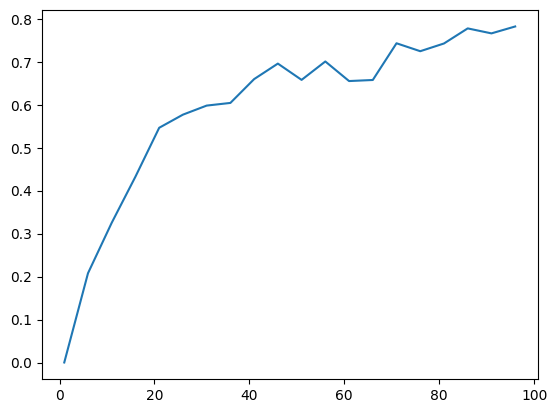

In [15]:
# === 10. Curse of Dimensionality ===
from scipy.spatial import distance
import numpy as np
import random

def random_distances(dim, num_pairs):
    return [distance.euclidean(np.random.rand(dim), np.random.rand(dim))
            for _ in range(num_pairs)]

dimensions = range(1, 101, 5)
avg_distances = []
min_distances = []

for dim in dimensions:
     distances = random_distances(dim, 10000)
     avg_distances.append(np.mean(distances))
     min_distances.append(min(distances))

plt.plot(list(dimensions), list(np.array(min_distances) / np.array(avg_distances)))


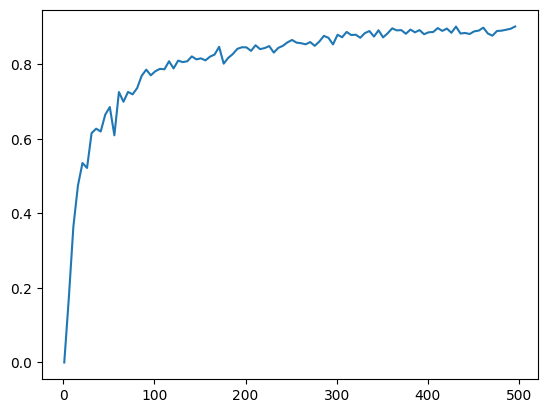

In [16]:
# Additional: Extended dimensionality test
dimensions = range(1, 501, 5)
avg_distances = []
min_distances = []

for dim in dimensions:
     distances = random_distances(dim, 10000)
     avg_distances.append(np.mean(distances))
     min_distances.append(min(distances))

plt.plot(list(dimensions), list(np.array(min_distances) / np.array(avg_distances)))